In [2]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt

%matplotlib inline

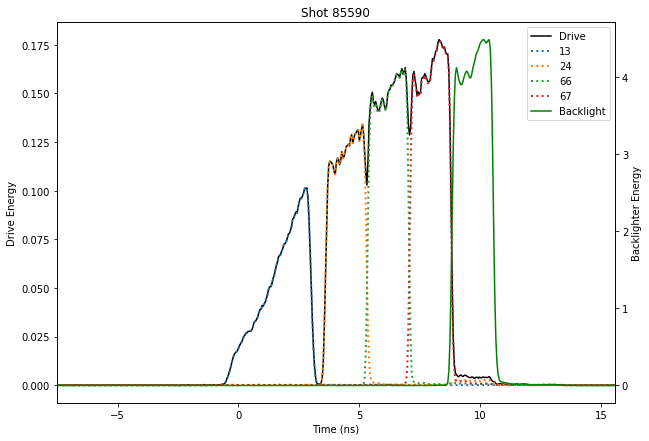

In [3]:
#To use:
#Download the pulse shape data.
#For Omega, this is found in Laser Images > P510 > P510_data_shotnumber.hdf
#Use HDFview to open the hdf file.

#Copy the "beams" string from the description of "SUMMARY_DATA_UV" (NOT SUMMARY_DATA_UV_AVERAGES)
beams = [13,20,22,23,24,25,26,30,31,39,50,55,56,57,58,61,62,65,66,67,68,69]

#Save SUMMARY_DATA_UV as "shotnumber"beams.csv in the folder in which this script is located.
#For example: 85590beams.csv

#Save SUMMARY_DATA_TIME as "shotnumber"times.csv in the folder in which this script is located.
#For example: 85590times.csv

#Copy the "ramp" and "drive" beam numbers from the shot request form and combine them into one list.
ramps = [13,24,66,67]

#Update the shot number.
shotnumber = 85590

#From here, you can run the script and it should put the plotted pulse shapes and a .csv into a folder labelled
#with the shot number.


energies = pd.read_csv(str(shotnumber)+"beams.csv", delimiter = "\t", names = beams)

times = pd.read_csv(str(shotnumber)+"times.csv", names = "t")

XRSdata = pd.concat([times,energies], axis=1)

backlight = np.setdiff1d(beams, ramps, assume_unique=True)

XRSdata['drive'] = 0;
XRSdata['backlight'] = 0;

XRSdata['t'] /= 1000

for x in ramps:
    XRSdata['drive'] += XRSdata[x]

for z in backlight:
    XRSdata['backlight'] += XRSdata[z]
    
if not os.path.exists(str(shotnumber)):
    os.makedirs(str(shotnumber))
    
XRSdata.to_csv(str(shotnumber)+'/'+str(shotnumber)+'drive.csv', columns = ['t','drive', 'backlight'], sep = ',', header = ['time (ns)', 'drive', 'backlight'], index=False)
    
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

XRSdata.plot(ax=ax1, x='t', y='drive', legend=False, color = 'black', label = 'Drive')
XRSdata.plot(ax=ax2, x='t', y='backlight', color='g', legend=False, label = 'Backlight')
for z in ramps:
        XRSdata.plot(ax=ax1, x='t', y=z, legend=False, linestyle = ':', linewidth = 2.0, label = '%d' % z)
ax1.set_ylabel('Drive Energy')
ax2.set_ylabel('Backlighter Energy')
ax1.set_xlabel('Time (ns)')

plt.title('Shot '+str(shotnumber))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


plt.savefig(str(shotnumber)+'/'+str(shotnumber)+"_pulse_shape.png")